In [4]:
import sympy
import numpy
x, y, z, t = sympy.symbols('x y z t')
sympy.init_printing()

# Derivatives

Use the commands:

- `sympy.diff`
- `EXPR.diff`

to evaluate a derivative or `Derivative` to let it unevaluated.

In [5]:
fx = x**5
fx

In [7]:
sympy.diff(fx, x)

In [8]:
sympy.diff(fx, x, 3)

In [9]:
fxy = x**5 * y**3
fxy

In [12]:
sympy.diff(fxy, x, 3, y, 2)

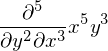

In [15]:
deriv = sympy.Derivative(fxy, x, 3, y, 2)
deriv

In [16]:
deriv.doit()

In [20]:
fxy.diff((x, 3), (y, 2))

# Integrals

Use the command `sympy.integrate` to evaluate the integral.

Use the command `sympy.Integral` to create an integral object.

In [21]:
fx = x * sympy.sin(x)
fx

In [23]:
sympy.integrate(fx, x)

In [24]:
sympy.diff( sympy.integrate(fx, x), x)

In [25]:
sympy.integrate(fx, (x,5,15))

In [28]:
sympy.integrate(fx, (x,5,15)).evalf()

In [31]:
sympy.integrate(sympy.exp(-x**2 - y**2), (x, -sympy.oo, sympy.oo), (y, -sympy.oo, sympy.oo))

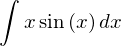

In [33]:
sympy.Integral(fx)

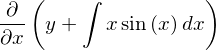

In [35]:
sympy.Derivative( sympy.Integral(fx,x)+y, x)

In [36]:
sympy.Derivative( sympy.Integral(fx,x)+y, x).doit()

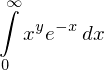

In [39]:
sympy.Integral(x**y*sympy.exp(-x), (x, 0, sympy.oo))

# Limit

Compute limits!!! Like:

$$ \lim\limits_{x \rightarrow x_o} f(x) $$

Use the command `sympy.limit` to evaluate the limit or the command `Limit` to create a limit object.

In [49]:
fx = x * sympy.sin(x)
fx

In [50]:
sympy.limit(fx, x, 0)

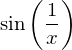

In [51]:
fx = sympy.sin(1/x)
fx

In [52]:
sympy.limit(fx, x, 0)

In [53]:
fx = 1/x
fx

In [54]:
sympy.limit(fx, x, 0)

In [57]:
sympy.limit(fx, x, 0, '+')

In [59]:
sympy.limit(fx, x, 0, '-')

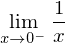

In [60]:
sympy.Limit(fx, x, 0, '-')

# Series Expansion

It is very important in numerical analysis! Here the Taylor series are used.

Use the command `EXPR.series` to expand using the Taylor series. Pass the variable that must be used in the expansion as argument.

You can optionally pass two arguments to that function:

- `x0`: point around the series will be calculated.
- `n`: serie approximantion order.

There is also the Landau term $O(x^4)$, that represents the
behaviour of the approximantion when $x - x_0 \rightarrow 0$
(the computer science BigO notation represents the behaviour when $x \rightarrow \infty$).

You can create those objects with the command `sympy.O` and you can remove it from an expression using `EXPR.removeO()`.

In [62]:
fx = sympy.sin(x)
fx

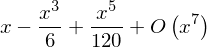

In [65]:
fx.series(x, x0=0, n=7)

In [67]:
x**2 + 3*x**3 + 4*x**5

In [70]:
x**2 + 3*x**3 + 4*x**5 + sympy.O(x**4)
# incorporates all terms above the approximation order

In [81]:
sinSerie = sympy.lambdify(x, sympy.sin(x).series(x, x0=0, n=14).removeO(), numpy)
for v in numpy.arange(10):
    print(r'{:> 15.10f} = {:< 15.10f} ; error = {:< 20.10f}'.format(sinSerie(v), numpy.sin(v),sinSerie(v)-numpy.sin(v)))

   0.0000000000 =  0.0000000000   ; error =  0.0000000000       
   0.8414709848 =  0.8414709848   ; error =  0.0000000000       
   0.9092974515 =  0.9092974268   ; error =  0.0000000247       
   0.1411306272 =  0.1411200081   ; error =  0.0000106191       
  -0.7560275116 = -0.7568024953   ; error =  0.0007749837       
  -0.9375840490 = -0.9589242747   ; error =  0.0213402256       
   0.0371628372 = -0.2794154982   ; error =  0.3165783354       
   3.7172455469 =  0.6569865987   ; error =  3.0602589481       
  22.5893783583 =  0.9893582466   ; error =  21.6000201116      
 120.2378642842 =  0.4121184852   ; error =  119.8257457989     


# Finite Differences

In [86]:
f = sympy.symbols('f', cls=sympy.Function)
f(x)

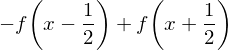

In [92]:
sympy.differentiate_finite(f(x), x) # it uses 1 as step

In [96]:
sympy.differentiate_finite(f(x), x, points=1/2)

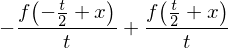

In [101]:
sympy.differentiate_finite(f(x), x, points=t)

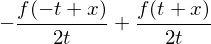

In [103]:
sympy.differentiate_finite(f(x), x, points=2*t)

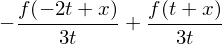

In [104]:
sympy.differentiate_finite(f(x), x, points=[x+t, x-2*t])

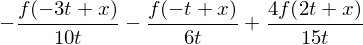

In [119]:
sympy.differentiate_finite(f(x), x, points=[x-3*t, x-t, x+2*t])

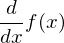

In [106]:
sympy.Derivative(f(x),x)

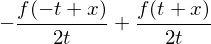

In [115]:
sympy.Derivative(f(x),x).as_finite_difference(points=2*t)

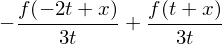

In [117]:
f(x).diff(x).as_finite_difference(points=[x+t, x-2*t])